# User Clustering Practice

https://www.kaggle.com/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_table('C:/Users/USER/Desktop/Data_Practices/user_clustering/marketing_campaign.csv', sep = '\t')

In [3]:
user_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Meaning of Variables

### People
ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if customer complained in the last 2 years, 0 otherwise  

### Products
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

### Promotion
NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

### Place
NumWebPurchases: Number of purchases made through the company’s web site  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s web site in the last month  

## Basic 전처리, EDA

In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
user_df.loc[user_df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


약 1% 정도의 유저고, 정확한 분류 문제 해결을 위해 drop이 조금 더 적절해보인다.

In [6]:
user_df = user_df.dropna()

In [7]:
user_df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [8]:
user_df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [9]:
# user_df childs
user_df['Childs'] = user_df.Kidhome + user_df.Teenhome

<ipython-input-9-cec93a8c3af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Childs'] = user_df.Kidhome + user_df.Teenhome


<AxesSubplot:xlabel='Kidhome', ylabel='count'>

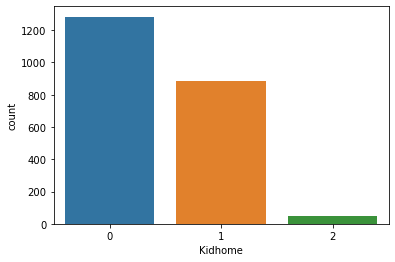

In [10]:
sns.countplot(x = user_df.Kidhome)

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

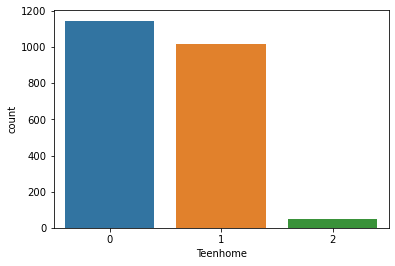

In [11]:
sns.countplot(x = user_df.Teenhome)

<AxesSubplot:xlabel='Childs', ylabel='count'>

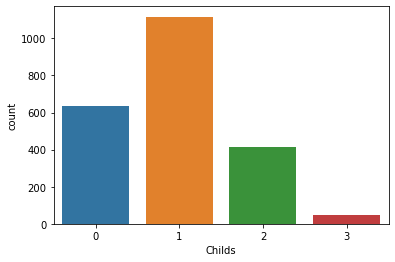

In [12]:
sns.countplot(x = user_df.Childs)

<AxesSubplot:xlabel='Recency', ylabel='Count'>

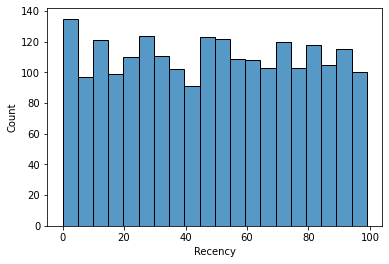

In [13]:
sns.histplot(x = user_df.Recency, bins = 20)

In [14]:
user_df.Complain.value_counts()

0    2195
1      21
Name: Complain, dtype: int64

MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

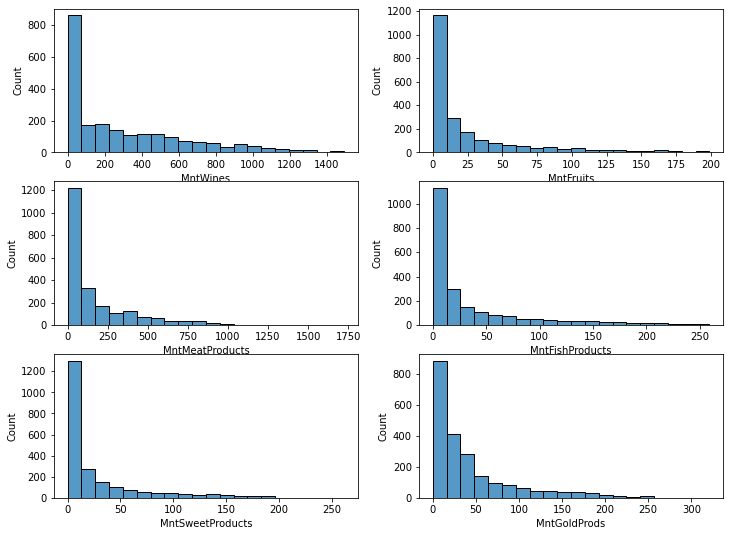

In [15]:
plt.figure(figsize=(12, 9))

plt.subplot(321)
sns.histplot(x = user_df.MntWines, bins = 20)

plt.subplot(322)
sns.histplot(x = user_df.MntFruits, bins = 20)

plt.subplot(323)
sns.histplot(x = user_df.MntMeatProducts, bins = 20)

plt.subplot(324)
sns.histplot(x = user_df.MntFishProducts, bins = 20)

plt.subplot(325)
sns.histplot(x = user_df.MntSweetProducts, bins = 20)

plt.subplot(326)
sns.histplot(x = user_df.MntGoldProds, bins = 20)

이들에 대해서도 좌편향이 되어있음을 알 수 있다..  
다만, 모든 품목의 구매 이력에 대해서 합쳐 고려하여 구매 총량에 대해 고려해볼 수 있을 것이다.  

In [16]:
user_df['MntTotal'] = user_df.MntWines + user_df.MntFruits + user_df.MntMeatProducts +\
                    user_df.MntFishProducts + user_df.MntSweetProducts + user_df.MntGoldProds

<ipython-input-16-59d29725fceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['MntTotal'] = user_df.MntWines + user_df.MntFruits + user_df.MntMeatProducts +\


In [17]:
user_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Childs,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,3,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,1,843


In [18]:
# user age, gen 계산
user_df['Age'] = user_df.Year_Birth.apply(lambda x : 2021 - x)

<ipython-input-18-33d7fd864a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Age'] = user_df.Year_Birth.apply(lambda x : 2021 - x)


In [19]:
sorted(user_df.Age.values, reverse = True)[:10]

[128, 122, 121, 81, 80, 78, 78, 78, 78, 78]

In [21]:
user_df.Age = user_df.Age.replace([128, 122, 121], np.nan)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
user_df = user_df.dropna()

<AxesSubplot:xlabel='Age', ylabel='Count'>

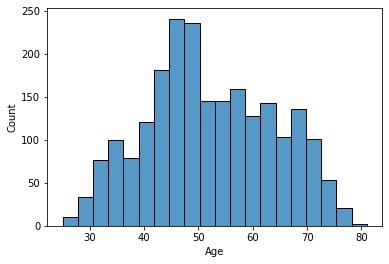

In [27]:
sns.histplot(user_df.Age, bins = 20)

In [29]:
user_df['Dt_year'] = user_df.Dt_Customer.apply(lambda s : s[-4:])

<ipython-input-29-79c6c7da70e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Dt_year'] = user_df.Dt_Customer.apply(lambda s : s[-4:])


<AxesSubplot:xlabel='Dt_year', ylabel='count'>

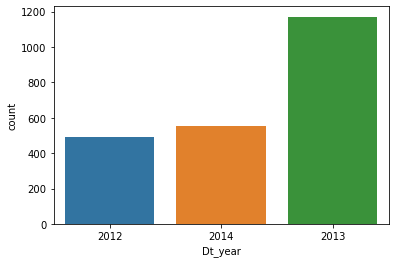

In [31]:
sns.countplot(x = 'Dt_year', data = user_df)

대부분의 고객은 2013년도에 서비스를 가입하였다.

<AxesSubplot:xlabel='Income', ylabel='Count'>

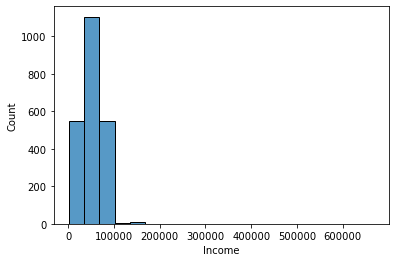

In [34]:
sns.histplot(user_df.Income, bins = 20)

In [33]:
user_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Childs', 'MntTotal', 'Age', 'Dt_year'],
      dtype='object')

## user의 분류 문제

user를 분류할 수 있는 새로운 기준(Nontrivial)을 찾아보기로 한다.